# Simple Linear Regression: Wine Quality vs Alcohol



Prompt: *Explore linear relationships in your data or the reference data using ideas from simple linear regression.*



In this notebook, we use the **red wine quality** dataset and focus on a single linear relationship:



- Response (y): `quality` (expert rating of wine quality)

- Predictor (x): `alcohol` (% by volume)



Goals:



- Fit and interpret a simple linear regression (`quality ~ alcohol`).

- Discuss dangers of extrapolation beyond observed alcohol levels.

- Compute and interpret how useful the regression is (R², correlation r).

- Look at the residual standard error ("standard error of the estimate").

- Use ANOVA / t-tests to check whether the relationship is statistically significant.

- Inspect residual plots for outliers / patterns and check regression assumptions.

- Build confidence and prediction intervals for mean and individual quality at a given alcohol level.

- Briefly comment on whether transformations might help.

In [35]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

sns.set(style="whitegrid", context="notebook")

In [36]:
# Load the red wine quality data
# Adjust the relative path if your folder structure is different.
data_path = '../PCA/data/winequality-red.csv'
wine = pd.read_csv(data_path, sep=';')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Quick data overview (variables and ranges)

We first look at basic summary statistics to understand the scale of `quality` and `alcohol`, and to see typical ranges.

In [37]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## 2. Visual relationship: `quality` vs `alcohol`



We start with a simple scatterplot of wine *quality* against *alcohol* and overlay a straight line of best fit.



This corresponds to the basic simple linear regression idea.

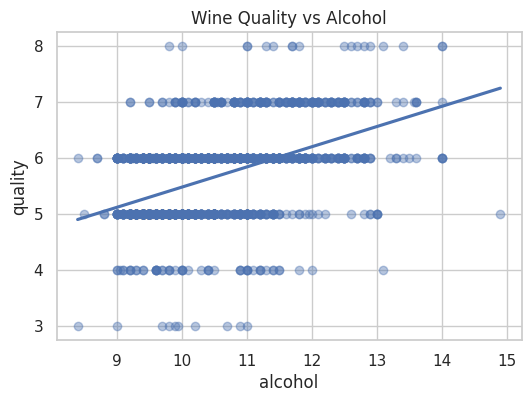

In [38]:
# Scatterplot with a simple regression line (using seaborn's regplot)
plt.figure(figsize=(6, 4))
sns.regplot(data=wine, x='alcohol', y='quality', ci=None, scatter_kws={'alpha': 0.4})
plt.title('Wine Quality vs Alcohol')
plt.show()

## 3. Fitting the simple linear regression



We now fit the simple linear regression model:



$quality = \beta_0 + \beta_1 \cdot alcohol + \varepsilon$.



We use `statsmodels` so we can easily access R², standard error, t-tests, and ANOVA-related quantities.

In [39]:
# Prepare design matrix for statsmodels (add constant for intercept)
y = wine['quality']
X = sm.add_constant(wine['alcohol'])  # adds a column of ones for the intercept

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           2.83e-91
Time:                        20:19:35   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Correlation and coefficient of determination



For simple linear regression, the square of the sample correlation `r` between x and y equals R².



Here we compute r between `alcohol` and `quality`, and compare `r**2` to the model's R².

In [40]:
# Compute correlation and verify that r^2 matches R-squared
r = np.corrcoef(wine['alcohol'], wine['quality'])[0, 1]
r2_from_corr = r ** 2
r, r2_from_corr, model.rsquared

(np.float64(0.47616632400113584),
 np.float64(0.2267343681127547),
 np.float64(0.2267343681127545))

## 5. Dangers of extrapolation



We should only trust the regression line in the range of alcohol values actually observed in the data.



Here we check the minimum and maximum alcohol content in the dataset.

In [41]:
wine['alcohol'].min(), wine['alcohol'].max()

(np.float64(8.4), np.float64(14.9))

## 6. Residuals, outliers, and regression assumptions

We now inspect residuals to check some of the standard regression assumptions:

- Linearity (no strong curve in residuals vs fitted).
- Constant variance (no strong funnel shape).
- Approximately normal residuals (for t-tests and intervals).
- Potential outliers or high-leverage points.

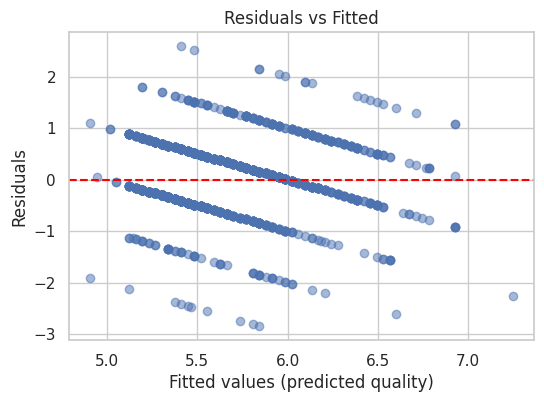

In [42]:
# Compute fitted values and residuals
fitted = model.fittedvalues
resid = model.resid

# Residuals vs fitted plot
plt.figure(figsize=(6, 4))
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (predicted quality)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

<Figure size 500x500 with 0 Axes>

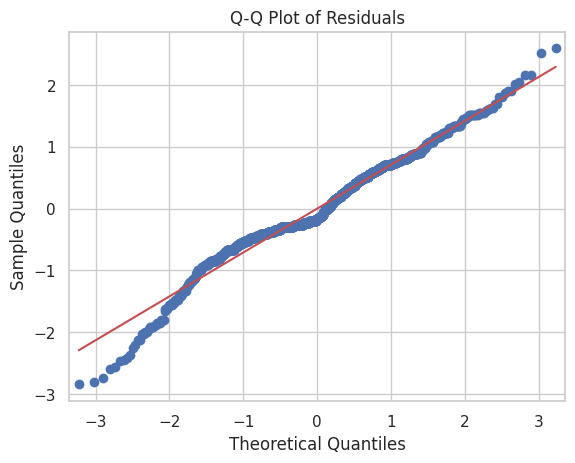

In [43]:
# Q-Q plot of residuals for normality check
plt.figure(figsize=(5, 5))
qqplot(resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

Comment on the plots:

- Do residuals look roughly centered around 0 with similar spread?
- Any obvious curvature (suggesting nonlinearity)?
- Any extreme outliers in residuals?
- Does the Q-Q plot show large deviations from the straight line (non-normality)?

## 7. Confidence and prediction intervals 

We now pick a specific alcohol level and compute:

- A **confidence interval** for the *mean* quality at that alcohol level.
- A **prediction interval** for the *quality of a single new wine* at that alcohol level.

In [44]:
# Choose an alcohol level inside the data range (adjust if needed)
alcohol_level = 10.0

# Build exog with the same columns as X: const and alcohol
new_X = pd.DataFrame({'const': [1.0], 'alcohol': [alcohol_level]})

pred = model.get_prediction(new_X)
pred_summary = pred.summary_frame(alpha=0.05)  # 95% intervals
pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.483393,0.019114,5.445902,5.520883,4.089547,6.877238


From the table above, note:

- `mean_ci_lower`, `mean_ci_upper`: confidence interval for the **mean** quality at this alcohol level.
- `obs_ci_lower`, `obs_ci_upper`: prediction interval for a **single new** wine at this alcohol level.

Explain in words how these intervals differ and why the prediction interval is wider.

## 8. Brief note on transformations 

Here we only touched a single linear relationship `quality ~ alcohol`, which already looks reasonably linear.

If residual plots showed strong curvature or non-constant variance, we could consider transformations such as:

- Transforming the predictor (e.g., log of a skewed variable).
- Transforming the response (e.g., Box–Cox family) to stabilize variance and improve linearity.

For this simple example, we mainly focus on understanding and interpreting the basic linear regression rather than optimizing transformations.